# **Homework 2 - Videogames Reviews**

*Group#12*

- **Marco Zimmatore** - [zimmatore.1947442@studenti.uniroma1.it](zimmatore.1947442@studenti.uniroma1.it)
- **Camilla Labbate** - [camillalabbate02@icloud.com](camillalabbate02@icloud.com)
- **Francesco De Martino** - [Demartino.1908303@studenti.uniroma1.it](Demartino.1908303@studenti.uniroma1.it)
- **Alessandro Querqui** - [querqui.2031384@studenti.uniroma1.it](querqui.2031384@studenti.uniroma1.it)

### **Libraries**

In [17]:
# Set this variable to True to install missing packages
install_packages = False

# Conditionally install packages
if install_packages:
    %pip install pandas matplotlib functions numpy seaborn scipy transformers
            
#Import The Libraries to manage and plot data
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import functions
import numpy as np
import seaborn as sns
import importlib
from scipy.stats import mannwhitneyu, pearsonr

To represent the alignment between the two columns, we have decided to show the sentiment distribution by Recommendation.

The following table printed by the function  `comparison_sentiment_recommendations` shows the count and the percentage of each sentiment type (negative, neutral, positive) for two groups: 
- reviews that do not recommend the item (marked as False) 
- reviews that do recommend it (marked as True)

In [85]:
#To avoid to restart the kernel whenever we change a function 
importlib.reload(functions)

<module 'functions' from 'c:\\Users\\Marco\\Desktop\\Data Science Magistrale\\ADM\\ADM-HW2\\ADM-HW2\\functions.py'>

---
### **[RQ1] - Exploratory Data Analysis (EDA)**
---

 EDA is a fundamental step to gain a clear view of the data, identify any anomalies, trends, correlations, and structure the dataset for further analysis.

Fitst of all, we load the csv file into a DataFrame 

In [4]:
df = pd.read_csv("../steam_reviews.csv", header="infer", index_col = 0)

#### **1. Exploring the Dataset**

Before doing further analysis, we want to understand the data. To do that, we can inspect the first rows of the dataset, check the dataset dimensions, identify the data types of each columns or count missing values.

We use the function **head()** to print the first 3 rows of our *DataFrame*.

In [43]:
#Print the first Three Rows of the DataFrame
df.head(3)

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09


In the Function `explore(df)` we print the following infos:
* **List of Columns of the DataFrame**;

* **Shape Of The DataFrame**: the attribute *shape* results in a tuple containing the number of total rows and columns;

* **DataTypes of The Columns**: the attribute *dtypes* gives as a result a list containing all the data types for each column;

* **Number of Missing Values**: for the columns having at least 1 missing value (Nan), it counts all the missing values through the function `df.isnull().sum()`;

In [75]:
functions.explore(df)

List of Columns of the DataFrame: Index(['app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played', 'month', 'hour',
       'minute'],
      dtype='object') 

Shape of the DataFrame: (21612444, 25) 

Data Types of the columns:
 app_id                                     int64
app_name                                  object
review_id                                  int64
language                                  object
review                                    object
timestamp_created                 datetime64[ns]
timestamp_updated                          int64
recommended 

#### **2. Tabular Summary**

The second step of EDA is to calculate statistics like mean, median, minimum through the Pandas function `describe()` and explore how data is ditributed ( for example, check if there are outliers...).

In [ ]:
df.describe()

,app_id,review_id,timestamp_created,timestamp_updated,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.172169e+07,2.174737e+07
mean,3.928181e+05,5.187500e+07,1.544432e+09,1.547556e+09,4.044689e+05,1.267917e+05,1.654424e-01,1.308768e-01,7.656120e+16,1.011300e+06,4.044775e+05,1.609105e+04,1.555421e+02,8.807421e+03,1.580505e+09
std,2.480977e+05,2.084267e+07,5.812194e+07,5.689899e+07,1.333741e+09,2.333553e+07,2.434006e-01,2.199398e+00,3.179134e+08,2.108829e+09,1.333741e+09,3.743057e+04,7.300488e+02,2.388553e+04,4.676178e+07
min,7.000000e+01,4.300000e+01,1.290198e+09,1.290198e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.427600e+05,3.639355e+07,1.510223e+09,1.511729e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,2.200000e+01,2.000000e+00,1.250000e+03,0.000000e+00,5.590000e+02,1.573329e+09
50%,3.595500e+05,5.384058e+07,1.562446e+09,1.572189e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,6.100000e+01,4.000000e+00,4.307000e+03,0.000000e+00,1.881000e+03,1.599058e+09
75%,5.780800e+05,6.928793e+07,1.589696e+09,1.591403e+09,1.000000e+00,0.000000e+00,4.827586e-01,0.000000e+00,7.656120e+16,1.450000e+02,1.000000e+01,1.491200e+04,0.000000e+00,6.823000e+03,1.609002e+09
max,1.291340e+06,8.521867e+07,1.611426e+09,2.283383e+09,4.398047e+12,4.294967e+09,9.959868e-01,4.893000e+03,7.656120e+16,4.398047e+12,4.398047e+12,3.744943e+06,2.703900e+04,3.228103e+06,1.611434e+09


In the realm of data analysis, it is crucial to identify and handle outliers, as they can significantly skew the results of statistical analyses. The following function `outliers(df)` outlines a systematic approach to detect outliers in the *comment_count* feature of our dataset using the **Interquartile Range (IQR)** method.

1. **Calculating Quartiles**:
   - **First Quartile (Q1)**: This value represents the 25th percentile of the data, marking the threshold below which 25% of the observations fall.
   - **Third Quartile (Q3)**: Conversely, this is the 75th percentile, where 75% of the data lies below this value.

   We calculate these quartiles as follows:
      ```python
         Q1 = df['comment_count'].quantile(0.25)
         Q3 = df['comment_count'].quantile(0.75)
      ```
2. **InterQuartile Range** is $IQR = Q3 - Q1 $ and captures 50% of the data.


3. Using **IQR** we can define the Bounds for **Outlier Detection**:
   - **Lower Bound** 
      ```python
      lower_bound = Q1 - 1.5 * IQR
      ```
   - **Upper Bound**
      ```python
      upper_bound = Q3 + 1.5 * IQR   
      ```
      
4. Lastly we can filter the DataFrame capturing values less than lower_bound and greater than upper_bound to capture our **outliers**


In [85]:
# Numbers of Outliers of Steam Comment Count

functions.ouliers(df)

Number of outliers in number of comments: 977777


#### Others Interesting Checks

- Number Of Apps Reviewed with the function `unique()`

In [76]:
#List of Apps reviewed
df['app_name'].unique().shape[0]

315

In [86]:
# Prints the number of unique reviews
total_reviews = df['review_id'].nunique()
print(f"Total reviews: {total_reviews}\n")

# Prints the number of apps reviewed
unique_apps = df['app_id'].nunique()
print(f"Unique apps reviewed: {unique_apps}\n")


Total reviews: 21612444

Unique apps reviewed: 315



In [10]:

# Print the average of helpful votes per review
average_votes_helpful = df['votes_helpful'].mean()
print(f"Average helpful votes: {average_votes_helpful}\n")

# Prints the average of the playtime of all the reviewers
# We group by author.steamid firstly and then compute the mean
average_playtime_forever = df.groupby('author.steamid')['author.playtime_forever'].agg('first').mean()
print(f"Average playtime forever: {round(average_playtime_forever, 2)} hours")



Average helpful votes: 404468.8552777713

Average playtime forever: 18912.16 hours


We can see that the average playtime is quite high, probably due to  **Outliers**: extreme values could be skewing the average, such as users with extremely high playtimes compared to the majority.

So we compute the median to obtain a value that summarize the distribution better than the average.

In [11]:
# Calculate the median playtime
median_playtime = df.groupby('author.steamid')['author.playtime_forever'].agg('first').median()
print(f"Median playtime: {median_playtime} hours")


Median playtime: 5224.0 hours


- **Average Helpful Votes**:

    The average of approximately **407,000** helpful votes suggests a robust level of community interaction with reviews.

- **Average Playtime Forever**:

    With a median playtime of **5,224** hours compared to an average playtime of **18,912** hours, we can observe a significant difference between the two measures of central tendency due to the presence of **Outliers**


In [78]:

# Prints the top 5 most used languages in the reviews
top_5_languages = df['language'].value_counts().head()
print(f"Top 5 Languages most used for reviews:\n {top_5_languages}\n")

Top 5 Languages most used for reviews: language
english      9580668
schinese     3729039
russian      2340950
brazilian     826897
spanish       804361
Name: count, dtype: int64



**Summary of Findings**:
- **Dominance of English**:<br>

    The English language stands out as the most widely used language for reviews, with an impressive count of **9,580,668** reviews. This represents a significant majority of the total reviews, indicating that English-speaking users are the most active demographic on Steam. This dominance may reflect the platform's origin in an English-speaking country and the global reach of English as a lingua franca in the gaming community.
- **Emerging Languages**:

    Brazilian Portuguese and Spanish follow, with **826,897** and **804,361** reviews, respectively. These figures indicate a growing presence of players from Brazil and Spanish-speaking countries. The increasing number of reviews in these languages signals potential markets for developers looking to expand their reach and engage with these communities effectively.

#### **3. Visualize**

Lastly, we want to plot the dataset to understand the correlations between columns.

- What are the five apps with the most reviews?

C:\Users\Marco\AppData\Local\Temp\ipykernel_17596\1143948266.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_5_apps, palette='viridis')


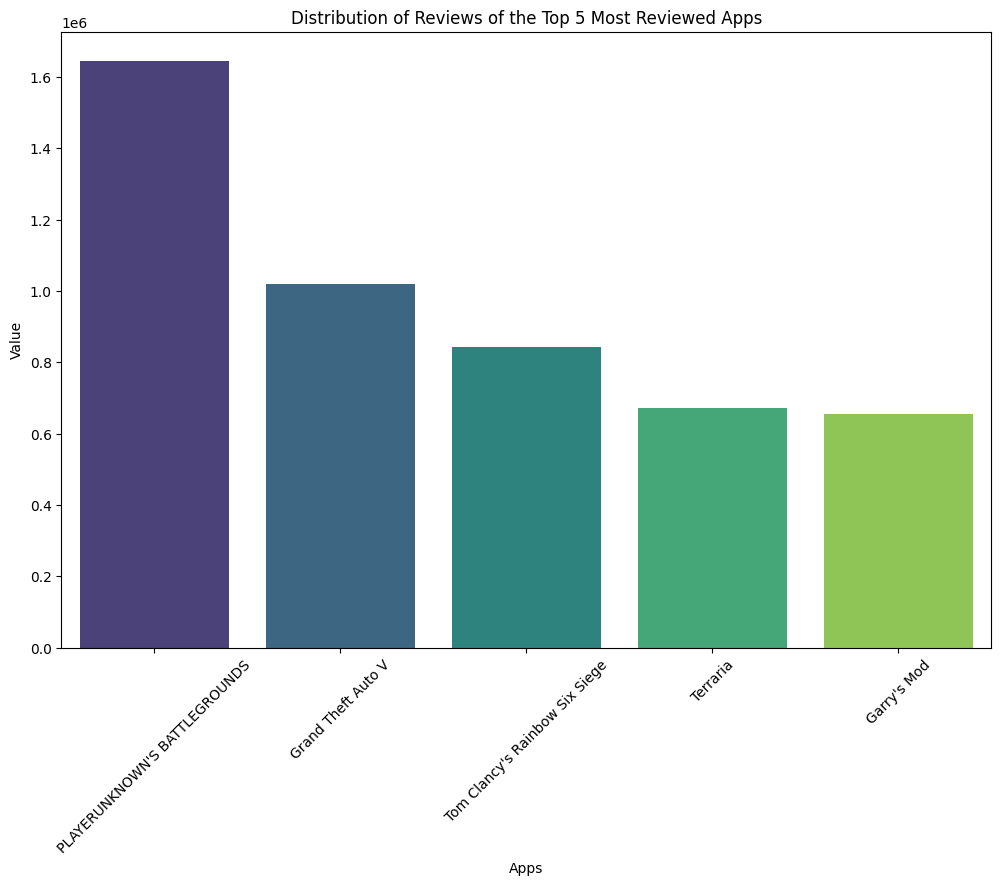

In [102]:
# Bar Plot Histogram
top_5_apps = df['app_name'].value_counts().head(5)

plt.figure(figsize=(12, 8))
sns.barplot(data = top_5_apps, palette='viridis')
plt.title('Distribution of Reviews of the Top 5 Most Reviewed Apps')
plt.xlabel('Apps')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

---
- We would like to know also who are the top 5 reviewers in Steam.

C:\Users\Marco\AppData\Local\Temp\ipykernel_17596\1202052364.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_5_reviewers, palette='mako')


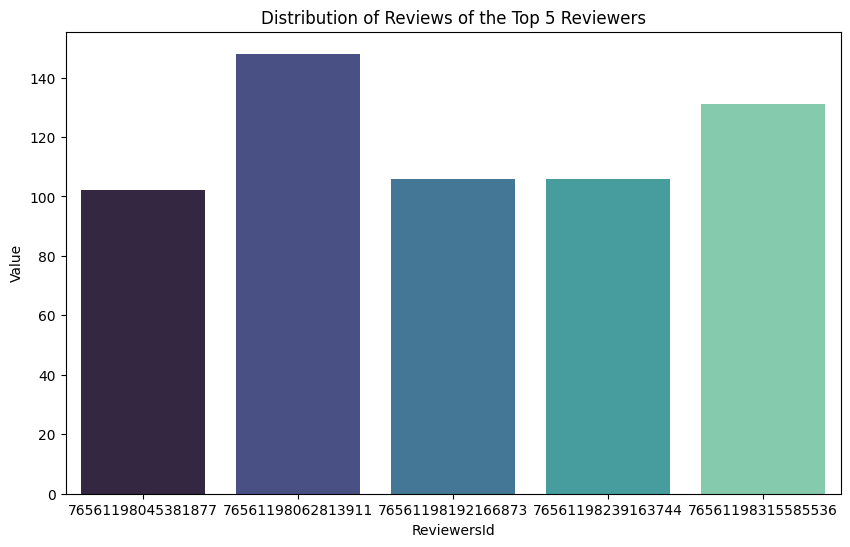

In [104]:
# We Calculate the first five reviewers per number of reviews in the dataset
top_5_reviewers = df['author.steamid'].value_counts().head(5)

# Create and Plot the figure
plt.figure(figsize=(10, 6))
sns.barplot(data = top_5_reviewers, palette='mako')
plt.title('Distribution of Reviews of the Top 5 Reviewers')
plt.xlabel('ReviewersId')
plt.ylabel('Value')
plt.show()

---
- The following BarPlot depicts every language found in the review dataset with its count of reviews where it was used.

C:\Users\Marco\AppData\Local\Temp\ipykernel_17596\3823190010.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_by_review.index, y=language_by_review, palette='crest')


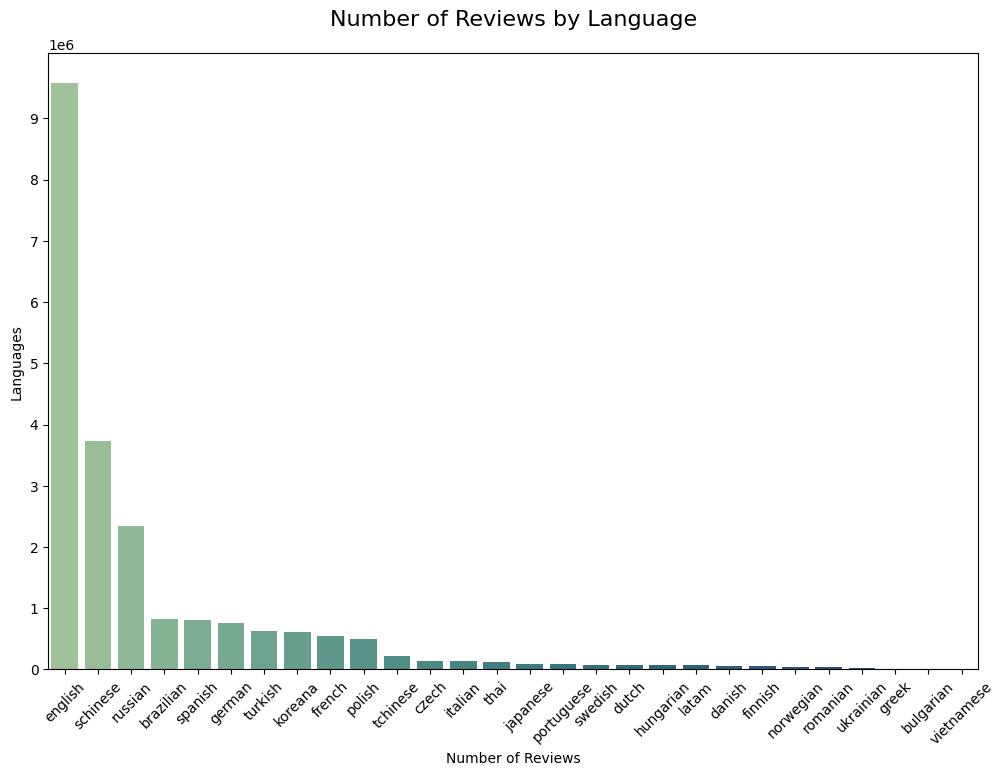

In [93]:
# Bar Plot
language_by_review = df['language'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=language_by_review.index, y=language_by_review, palette='crest')
plt.title('Number of Reviews by Language', fontsize=16, pad=20)
plt.xlabel('Number of Reviews')
plt.ylabel('Languages')
plt.yticks(ticks=range(0, language_by_review.max() + 1, 1000000)) 
plt.xticks(rotation=45)
plt.show()

---
- The Following heatmap visualizes the distribution of reviews across different days of the week and hours of the day. Each cell represents the count of reviews during a specific hour on a given day. 


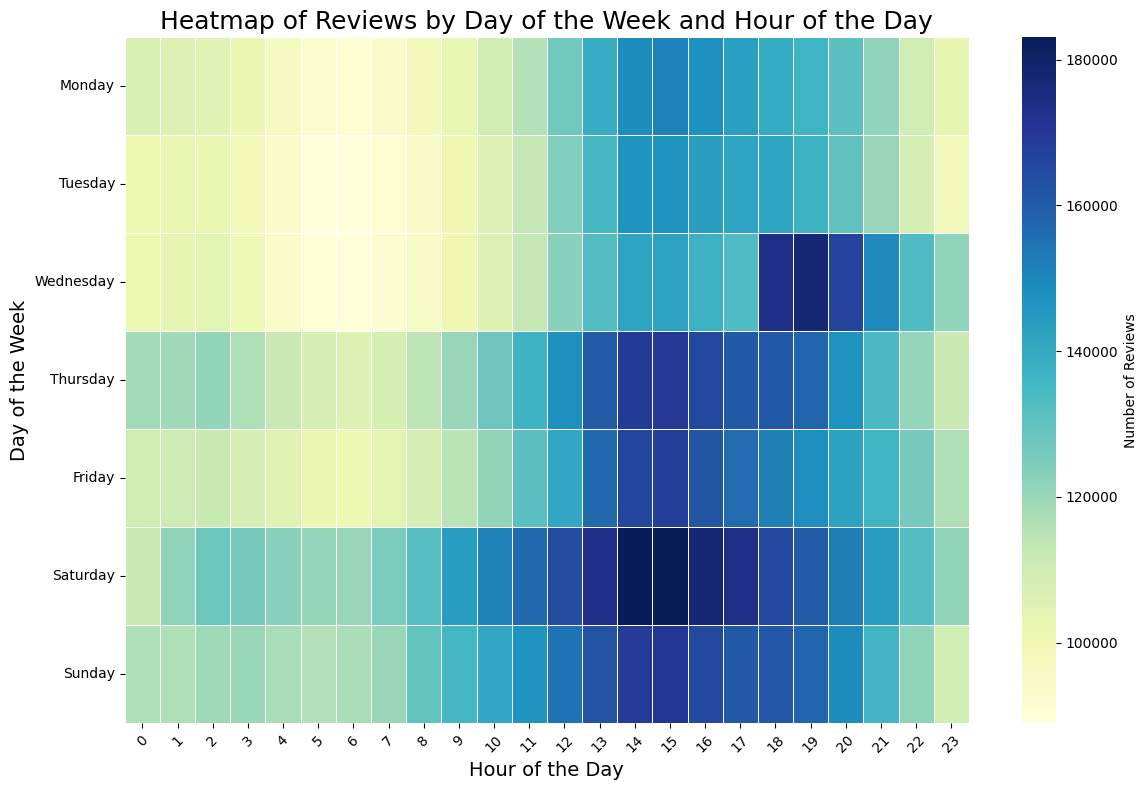

In [92]:
# Ensure the timestamp column is in datetime format
new_df_visual = df.copy()
new_df_visual['timestamp_created'] = pd.to_datetime(new_df_visual['timestamp_created'])

# Extract day of the week and hour from the timestamp
new_df_visual['day_of_week'] = new_df_visual['timestamp_created'].dt.day_name()  # Get the name of the day
new_df_visual['hour'] = new_df_visual['timestamp_created'].dt.hour  # Get the hour

# Count the number of reviews for each combination of day and hour
review_counts = new_df_visual.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

# Reorder the days of the week for correct heatmap display
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
review_counts = review_counts.reindex(ordered_days)

# Set up the figure and axes
plt.figure(figsize=(12, 8))
sns.heatmap(review_counts, cmap='YlGnBu', annot=False, fmt='d', linewidths=.5, cbar_kws={"label": "Number of Reviews"})

# Title and labels
plt.title('Heatmap of Reviews by Day of the Week and Hour of the Day', fontsize=18)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Day of the Week', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#### Key Observations:

- **Color Intensity**: The varying shades of color indicate the number of reviews, with darker shades typically representing higher counts. This allows for quick visual identification of peak review periods.
  
- **Trend Analysis**: By examining the heatmap, we can observe trends in user engagement. For instance, certain days may have significantly more reviews than others, suggesting a pattern in user activity.

- **Time Management**: This visualization can assist stakeholders in understanding when to focus their marketing efforts or manage server load, as it highlights peak times for user activity.


---
### **[RQ2] - Analysis of the Distribution of reviews**
---

1. Identify which applications have the highest and lowest number of reviews

The Function `highest_lowest_reviews_applications(df)` returns the App with the Most reviews and the App with the least reviews

In [ ]:

functions.highest_lowest_reviews_applications(df)


Top apps with the most reviews:
                                 count_reviews
app_name                                    
PLAYERUNKNOWN'S BATTLEGROUNDS        1644255

Top apps with the minimum reviews:
                  count_reviews
app_name                     
Neon Hardcorps            200



#### **Top App with Maximum Reviews**

- **App Name**: PLAYERUNKNOWN'S BATTLEGROUNDS
- **Total Reviews**: 1,644,255

**Observation**: PLAYERUNKNOWN'S BATTLEGROUNDS (PUBG) stands out as the most reviewed game in the dataset, with over 1.6 million reviews. This high volume of reviews indicates a significant level of engagement and interest from players, reflecting the game's popularity and its impact on the gaming community.

#### **App with Minimum Reviews**

- **App Name**: Neon Hardcorps
- **Total Reviews**: 200

**Observation**: In contrast, Neon Hardcorps has the lowest number of reviews in the dataset, totaling only 200. This could suggest that the game has either a smaller player base, limited visibility, or less engagement compared to more popular titles.


2. Plot the number of reviews for each application in descending order. What insights can you draw from the plot?


The `reviews_count_plot` function generates a bar plot visualizing the number of reviews for each application in the provided DataFrame `df`. 

1. **Grouping and Counting**: The function first groups the DataFrame by `app_name` and calculates the total number of reviews for each app, storing the results in a new DataFrame called `review_counts`.

2. **Sorting**: It then sorts the `review_counts` DataFrame in descending order based on the number of reviews, ensuring that the most reviewed applications appear at the top.

3. **Plotting**: Using Seaborn, the function creates a bar plot where the x-axis represents the application names and the y-axis represents the corresponding number of reviews. 

4. **Customization**: The x-axis labels are customized to show only the names of the most and least reviewed applications for clarity, with labels rotated for better readability.


c:\Users\Marco\Desktop\Data Science Magistrale\ADM\ADM-HW2\ADM-HW2\functions.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  #Create the bar plot with x = 'app_name' and y = 'count_reviews'


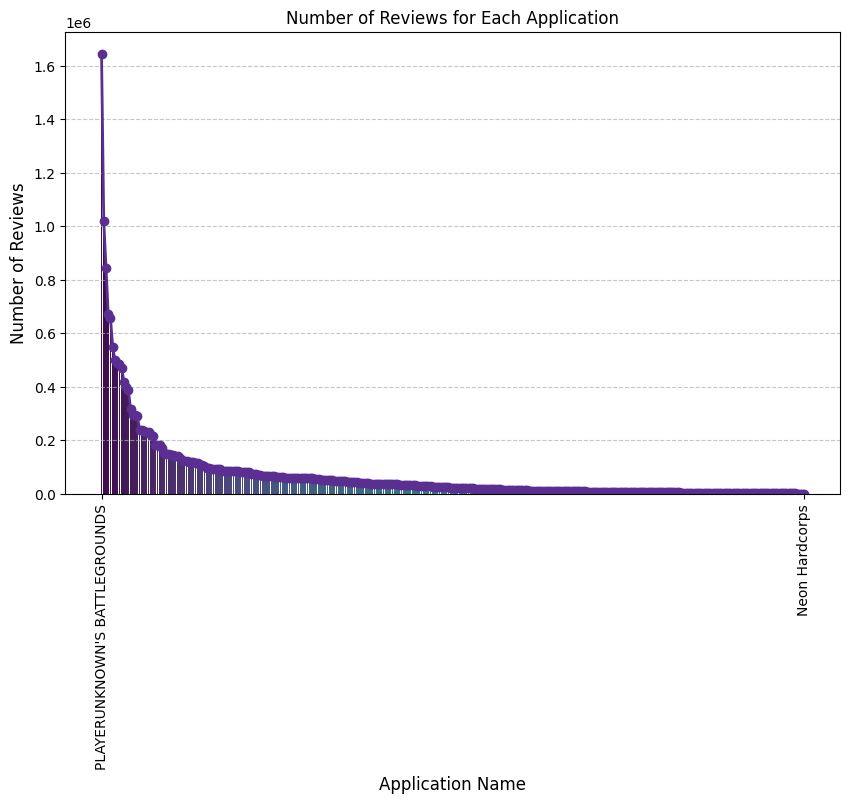

In [101]:
functions.reviews_count_plot(df)

- Like we have seen in the previous exercise, **PLAYERUNKNOWN'S BATTLEGROUNDS** and **Neon Hardcorps** are the Apps with the most and the least reviews.
---

3. For the top 5 applications by number of reviews, how many reviews came from users who purchased the application versus those who received it for free? Provide a percentage breakdown and highlight any similarities.


- The Function `puchased_gratis_reviewers(df)` calculates the percentage of reviewers who purchased or received for free the top 5 most reviewed apps from a dataset, filtering by the Top 5 most reviewed apps and then counting the number of reviewers that purchased the app (grouping by the app) and dividing by the total number of reviews of each app. It does the same for the percentage of the reviewers that purchased the app for free.


### Percentage Breakdown of Reviewers for the Top 5 Most Reviewed Apps

#### 1. Percentage of Reviewers That Purchased the App

| App Name                                    | Percentage of Purchase Reviewers |
|---------------------------------------------|-----------------------------------|
| Garry's Mod                                | 84.09%                            |
| Grand Theft Auto V                         | 88.83%                            |
| PLAYERUNKNOWN'S BATTLEGROUNDS              | 83.49%                            |
| Terraria                                   | 78.44%                            |
| Tom Clancy's Rainbow Six Siege             | 83.44%                            |

#### 2. Percentage of Reviewers That Received the App for Free

| App Name                                    | Percentage of Free Reviewers      |
|---------------------------------------------|-----------------------------------|
| Garry's Mod                                | 3.78%                             |
| Grand Theft Auto V                         | 3.79%                             |
| PLAYERUNKNOWN'S BATTLEGROUNDS              | 3.74%                             |
| Terraria                                   | 3.00%                             |
| Tom Clancy's Rainbow Six Siege             | 4.31%                             |

### Analysis of Similarities and Differences

1. **High Purchase Rates**: 
   - All five games have a high percentage of reviewers who purchased the game, ranging from **78.44% to 88.83%**. This indicates a strong customer base that is willing to buy these titles rather than obtaining them for free. 
   - **Grand Theft Auto V** stands out with the highest purchase percentage at **88.83%**, while **Terraria** has the lowest at **78.44%**.

2. **Low Free Access**: 
   - The percentage of reviewers who received the game for free is remarkably low across all titles, ranging from **3.00% to 4.31%**. This suggests that these games are primarily acquired through purchases, which may reflect their value and demand in the market.
   - **Terraria** has the lowest percentage of free access at **3.00%**, while **Tom Clancy's Rainbow Six Siege** has the highest at **4.31%**.

3. **Similar Trends**: 
   - The purchase rates are consistently high while the free access rates remain low, showing a correlation between the perceived value of these popular games and the purchasing behavior of the reviewers. 
   - The small differences in percentages indicate that despite variations in specific titles, the overall trend among the top five reviewed apps reflects a common behavior among users preferring to purchase rather than receive for free.

We can also notice that the 2 columns of the small table we've realized dont sum up, to underline that thare are some reviewers that have not purchased the app on steam nor gotten for free.

___

4. Which applications have the most and the least user recommendations? Summarize your findings.


- The function `most_least_recommended_reviews_applications` identifies the most and least recommended apps from a dataset based on user recommendations.


In [ ]:
functions.most_least_recommended_reviews_applications(df)

app_name
PLAYERUNKNOWN'S BATTLEGROUNDS    886417
Name: recommended, dtype: int64
Most recommended apps:
                                 count_of_recommended_reviews
app_name                                                   
PLAYERUNKNOWN'S BATTLEGROUNDS                        886417

Least Recommended apps:
                  count_of_recommended_reviews
app_name                                    
Neon Hardcorps                            89



##### **Findings**

- **Most Recommended App**:  
  - **PLAYERUNKNOWN'S BATTLEGROUNDS** has the highest number of recommendations, with a total of **886,417** reviews endorsing the app. This suggests that it is highly regarded among players, indicating strong user satisfaction and appeal.

- **Least Recommended App**:  
  - **Neon Hardcorps** stands out as the least recommended app, with only **89** recommendations. This low figure may reflect poor user experience or dissatisfaction, highlighting a significant gap in user approval compared to more popular titles.

These findings illustrate a clear contrast in user sentiment, with **PLAYERUNKNOWN'S BATTLEGROUNDS** enjoying substantial popularity while **Neon Hardcorps** appears to struggle with acceptance in the market.

---


5. Is there a correlation between the number of recommendations and the applications' review scores? Use a statistical test to confirm the significance of the relationship.


### Idea 
We have to underline (if exists) a possible correlation between two feature, so we'll focus our analysis on the relationship between this two columns:
* ```recommended```
* ```review_scores```: 
    we define it as the normalized value in $[1,10]$ of the number of the sum of recommendation for each app divided by the total reviews


To achieve that, we compute the **Spearman coefficient**.
The Spearman correlation coefficient measures  the rank-based (monotonic) correlation between two continuous variables. 
* ```Coefficient Interpretation```:
    * $r=1$: Indicates a perfect positive monotonic relationship. As one variable's rank increases, the other variable's rank also increases consistently.
    * $r=−1$:Indicates a perfect negative monotonic relationship. As one variable's rank increases, the other variable's rank consistently decreases.

c:\Users\Marco\Desktop\Data Science Magistrale\ADM\ADM-HW2\ADM-HW2\functions.py:155: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=reviews_score, x='recommended', y='reviews_score', palette='coolwarm',
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


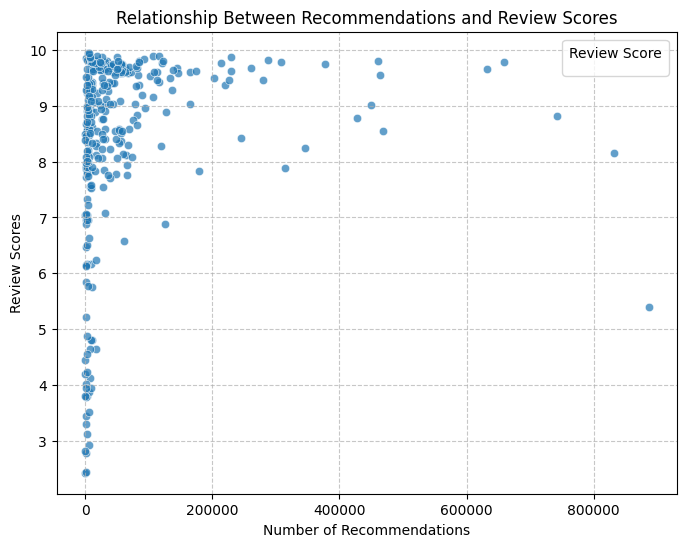

Spearman correlation coefficient: 0.45


In [23]:
functions.statistical_correlation(df)

Seen that the Spearman coefficient is quite greater than 0, we can say there is a medium relationship between the two columns.

---
### **[RQ3] - Date and Time**
---

1. Plot the number of reviews submitted each month and describe any trends.


- To record the number of reviews submitted each month, it is first necessary to convert the timestamp_created column from seconds into a readable date and time format.

In [36]:
df['timestamp_created']=pd.to_datetime(df['timestamp_created'], unit='s') 
print(df['timestamp_created'])

0          2021-01-23 06:00:29
1          2021-01-23 05:50:30
2          2021-01-23 05:46:40
3          2021-01-23 05:32:50
4          2021-01-23 05:23:47
                   ...        
21747371   2020-03-23 18:05:04
21747372   2020-03-23 18:04:53
21747373   2020-03-23 18:04:33
21747374   2020-03-23 18:03:51
21747375   2020-03-23 18:01:45
Name: timestamp_created, Length: 21747371, dtype: datetime64[ns]


- Next, it is necessary to extract the month from a timestamp_created column that has already been converted to datetime objects and store it in a new column called month.

In [37]:
df['month'] = df['timestamp_created'].dt.month #extract the month from timestamp_created
print(df['month'])

0           1
1           1
2           1
3           1
4           1
           ..
21747371    3
21747372    3
21747373    3
21747374    3
21747375    3
Name: month, Length: 21747371, dtype: int32


- Since we need to identify the reviews for each month, we use groupby to group the data in  df by month and count the number of reviews in each month.

In [38]:
monthly_rev=df.groupby('month').size() #count the number of reviews per month 
print(monthly_rev)

month
1     2131494
2     1338661
3     1520481
4     1317677
5     1299069
6     1935001
7     1896400
8     1269281
9     1212994
10    1482930
11    3760670
12    2582713
dtype: int64


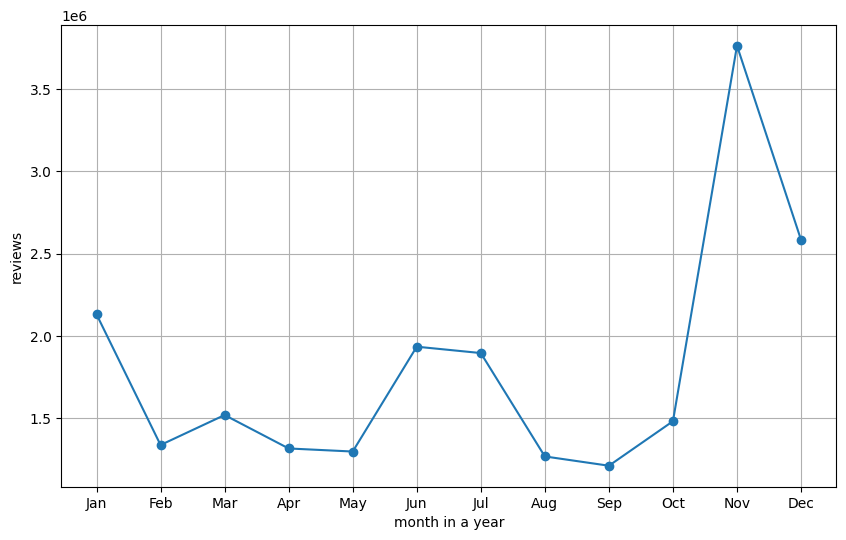

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
monthly_rev.plot(kind='line', marker='o')
plt.xlabel("month in a year")
plt.ylabel("reviews")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

2. Identify any seasonal patterns or trends in review activity. Explain any seasonal impact you notice.


* The overall trend in monthly review activity shows notable fluctuations throughout the year, with the highest peak in reviews occurring around November and the lowest point observed in September. This suggests that review activity is not steady; instead, it increases and decreases at different points throughout the year.The overall trend in the number of reviews each month is not consistent; it fluctuates, increasing and decreasing throughout the year.

* The highest number of reviews is recorded during the winter season. In spring, review activity decreases, only to rise again in summer. Starting in August, there’s a sharp decline in reviews, but this trend reverses in October and November as review activity picks up once more with the onset of winter.

___

3. Determine if certain times of the year have higher engagement rates. Describe noticeable peaks in user activity.


In [40]:
peaks=monthly_rev[ monthly_rev==monthly_rev.max()] #identify peaks
print(peaks)

troughs= monthly_rev[ monthly_rev==monthly_rev.min()] #identify lower engagement periods
print(troughs)

month
11    3760670
dtype: int64
month
9    1212994
dtype: int64


The month with the highest number of reviews ,when the peak is reached,is November (3760670) , while the month with the fewest reviews is September (1212994).


___

4. What is the most common time of day users write reviews? For example, users might typically write reviews at 17:44. Explain how this time distribution could influence your analysis.


In [41]:
df['hour'] = df['timestamp_created'].dt.hour #extract the hour from timestamp_created
print(df['hour'])
df['hour'] = df['timestamp_created'].dt.strftime('%H:%M')
time_reviews = df.groupby('hour')['review_id'].count().reset_index() #count the number of reviews per hour 
print(time_reviews)

0            6
1            5
2            5
3            5
4            5
            ..
21747371    18
21747372    18
21747373    18
21747374    18
21747375    18
Name: hour, Length: 21747371, dtype: int32
       hour  review_id
0     00:00      12802
1     00:01      12680
2     00:02      12777
3     00:03      12983
4     00:04      12735
...     ...        ...
1435  23:55      12797
1436  23:56      12756
1437  23:57      12779
1438  23:58      12933
1439  23:59      12807

[1440 rows x 2 columns]


Let's plot the data using a bar chart

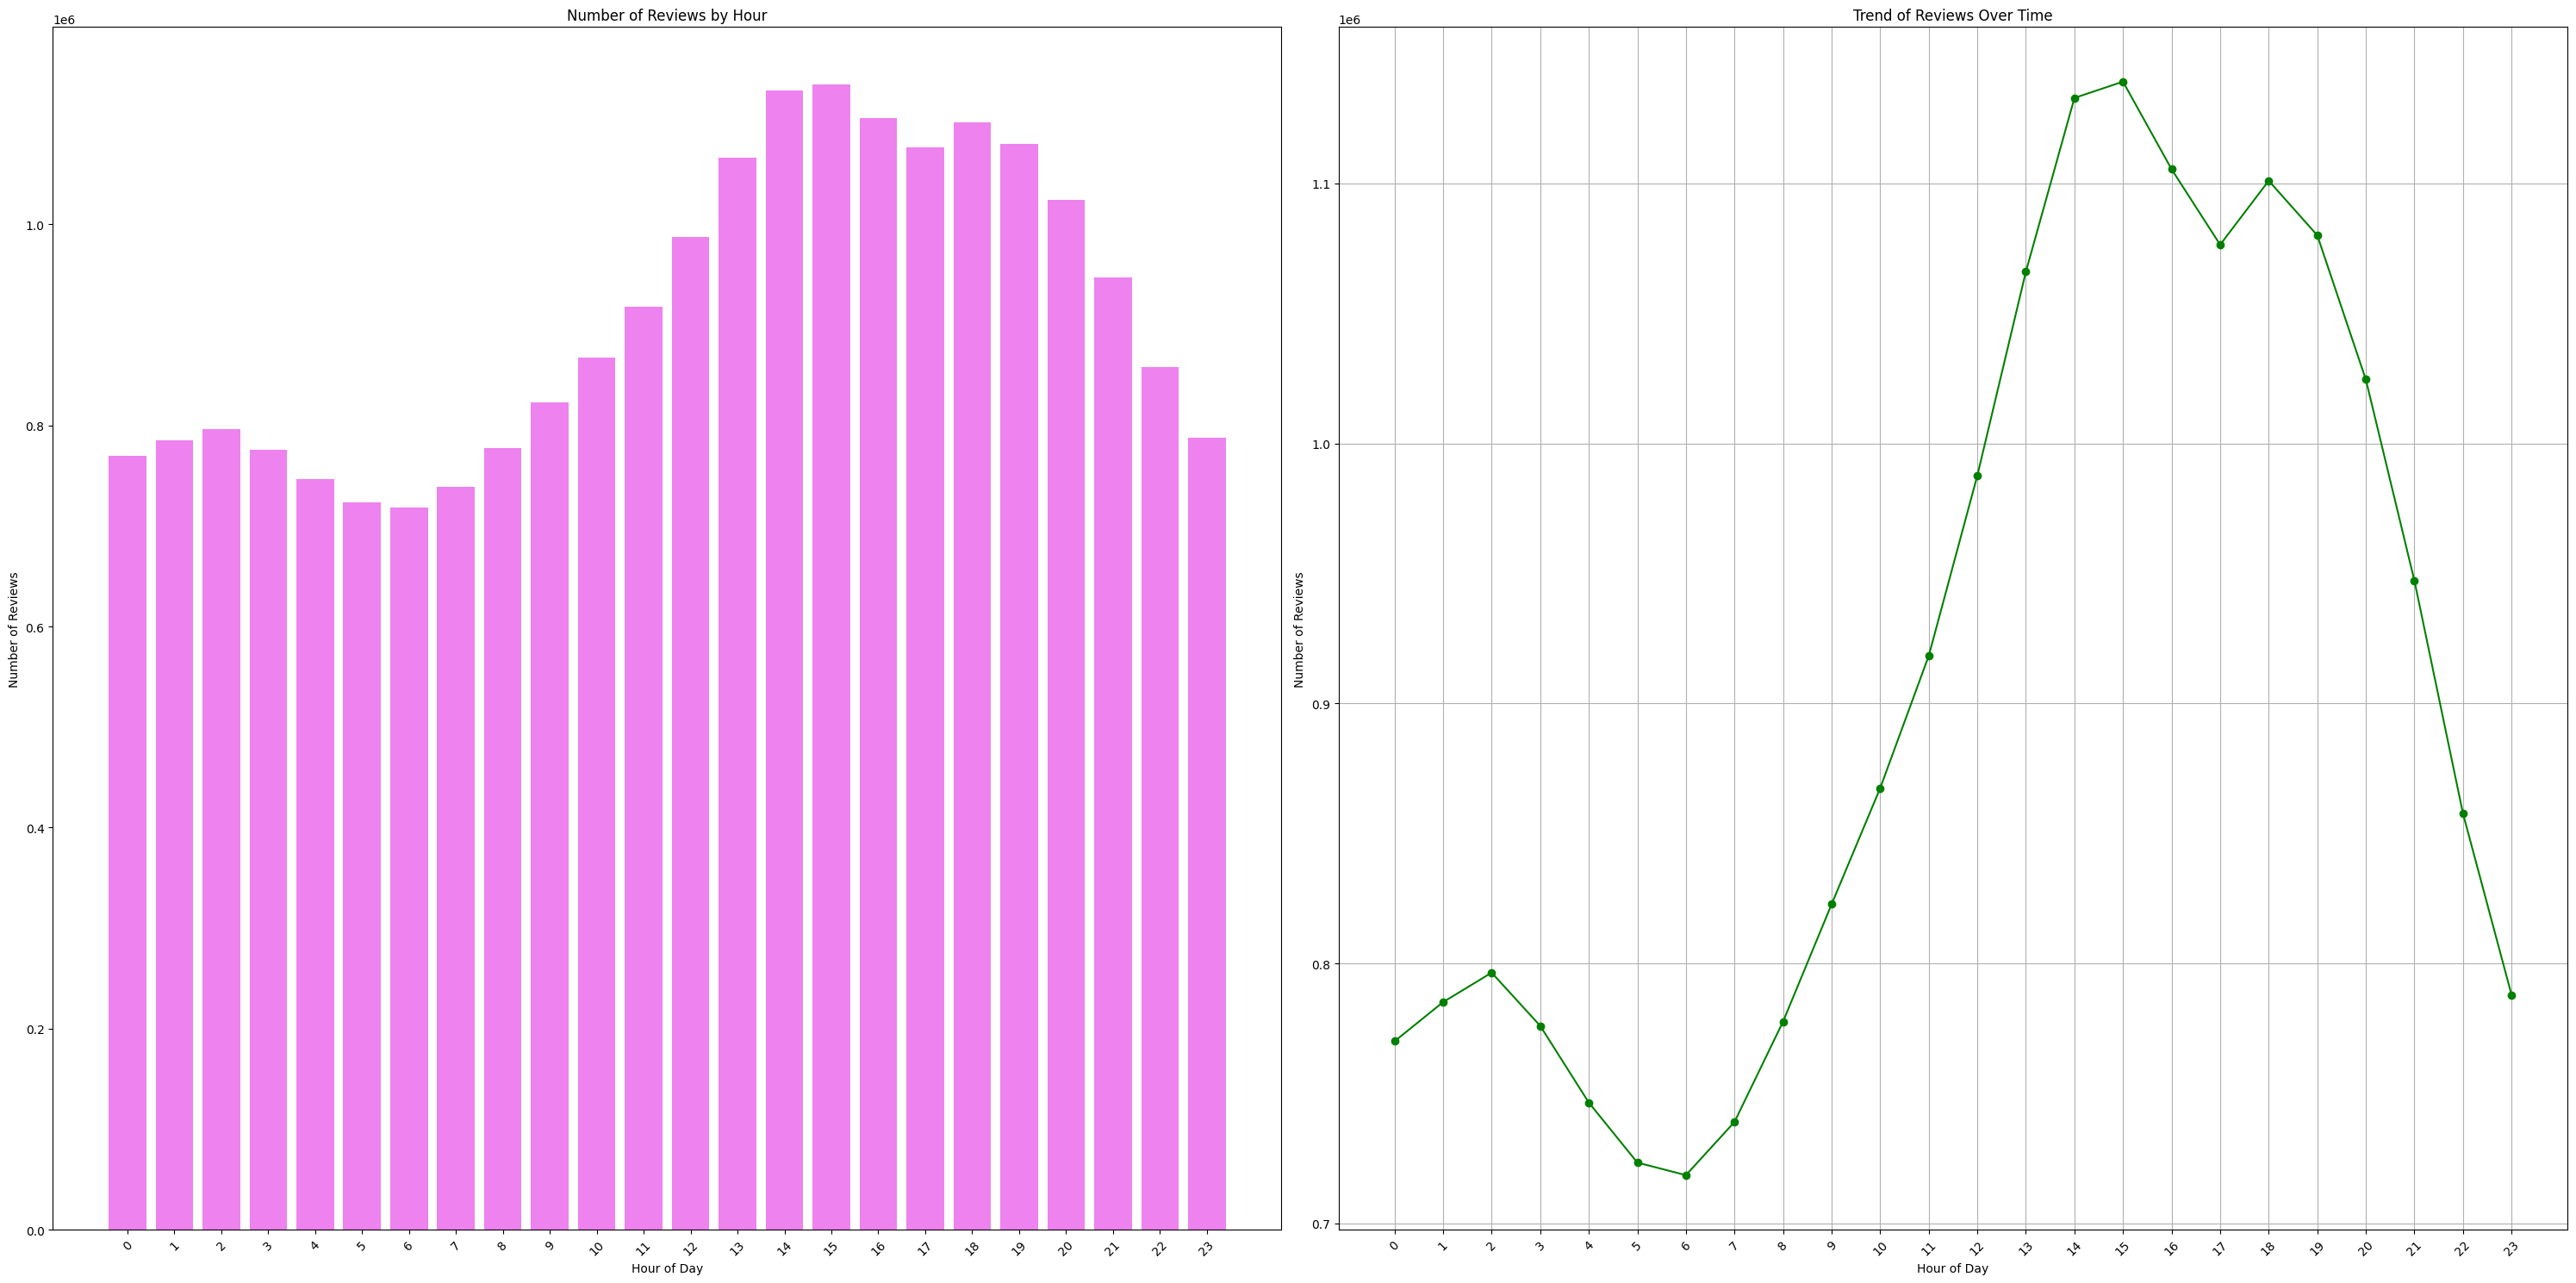

In [42]:
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'])  
df['hour'] = df['timestamp_created'].dt.hour  

hour_reviews = df.groupby('hour').size()
plt.figure(figsize=(30, 15))
# Bar Chart
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(hour_reviews.index.astype(str), hour_reviews.values, color='violet')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Hour')
plt.xticks(rotation=45)

# Line Graph
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(hour_reviews.index.astype(str), hour_reviews.values, marker='o', color='green')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Reviews')
plt.title('Trend of Reviews Over Time')
plt.xticks(rotation=45)

# Show the plots
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
most_common_time = time_reviews.loc[time_reviews['review_id'].idxmax(), 'hour']
most_common_count = time_reviews['review_id'].max()
print(f'The most common time for submitting reviews is at {most_common_time} with {most_common_count} reviews.')

least_common_time = time_reviews.loc[time_reviews['review_id'].idxmin(), 'hour']
least_common_count = time_reviews['review_id'].min()
print(f'The least common time for submitting reviews is at {least_common_time} with {least_common_count} reviews.')

The most common time for submitting reviews is at 14:50 with 19502 reviews.
The least common time for submitting reviews is at 06:02 with 11670 reviews.


Following the analysis, it emerged that the highest number of reviews(19502)is submitted at 2:50 PM.While the lowest number of reviews is submitted at 6:02 AM, with 11,670 reviews.From 6 AM to 3 PM, there is an increase in the number of reviews submitted by users, which then begin

___

5. Create a function that accepts a list of time intervals and plots the number of reviews for each interval.


In [44]:
def plot_reviews_by_time_intervals(df, intervals):
    # Extract time from timestamps
    df['time_only'] = df['timestamp_created'].dt.time

    counts = []

    # Count reviews in each interval
    for start, end in intervals:
        # Convert string times to datetime.time objects for comparison
        start_time = pd.to_datetime(start).time()
        end_time = pd.to_datetime(end).time()

        # Filter data within the interval
        mask = (df['time_only'] >= start_time) & (df['time_only'] <= end_time)
        count = df[mask].shape[0]  # Count rows matching the interval
        counts.append(count)


    interval_labels = [f"{start} - {end}" for start, end in intervals]
    plt.figure(figsize=(10, 6))
    plt.bar(interval_labels, counts, color='purple')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Time Intervals")
    plt.ylabel("Number of Reviews")
    plt.title("Number of Reviews per Time Interval")
    plt.tight_layout()
    plt.show()


6. Use the function to plot the number of reviews for the following time intervals:

| Initial Time | Final Time |
|--------------|------------|
| 00:00:00     | 02:59:59   |
| 03:00:00     | 05:59:59   |
| 06:00:00     | 10:59:59   |
| 11:00:00     | 13:59:59   |
| 14:00:00     | 16:59:59   |
| 17:00:00     | 19:59:59   |
| 20:00:00     | 23:59:59   |


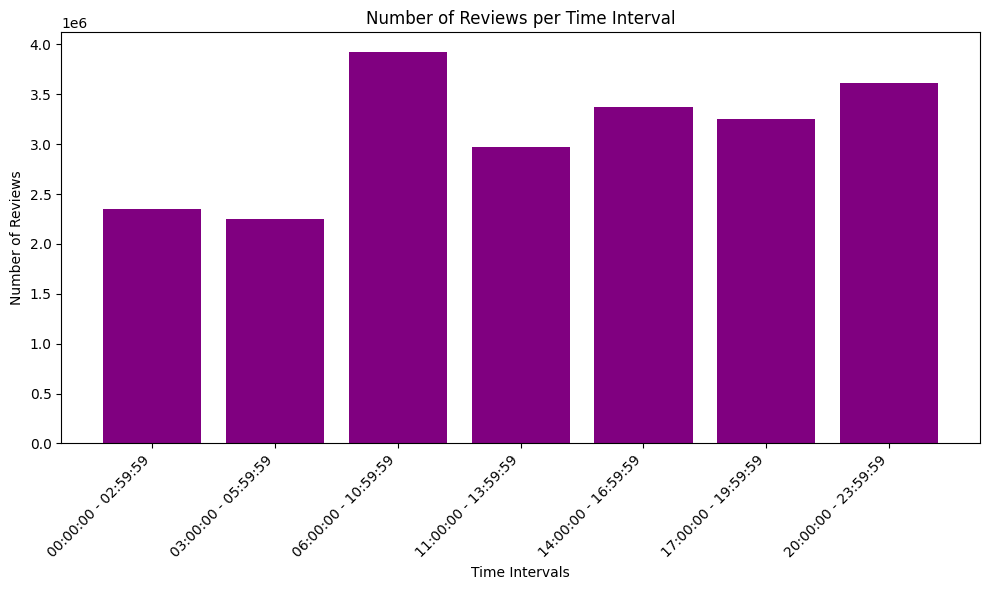

In [45]:

# Define the time intervals
intervals = [
    ("00:00:00", "02:59:59"),
    ("03:00:00", "05:59:59"),
    ("06:00:00", "10:59:59"),
    ("11:00:00", "13:59:59"),
    ("14:00:00", "16:59:59"),
    ("17:00:00", "19:59:59"),
    ("20:00:00", "23:59:59")
]


plot_reviews_by_time_intervals(df, intervals)

Through the study of time intervals, it emerged that the highest number of reviews is submitted between 6:00AM and 10:59AM in the morning. This finding is supported by the previous analysis( point 4), which examined reviews submitted hourly and showed an almost exponential increase in reviews, rising hour by hour from 6:00 and reaching a peak at 3:00 PM. Additionally, in the evening from 8:00 PM to 11:59 PM, the number of reviews remains high, then begins to decline after midnight.

---
### **[RQ4] - Investigating whether users who spend more time using an application give higher or lower ratings.**
---

1. Analyze the relationship between the amount of time a user has spent on an application and their review score.

The stam market does not have a complex review system, a user can evaluate the app as raccomended or not raccomended.
This creates a conondrum when tring to evaluate the review score.
Our answer is to evaluate the review score as the total sum of the interacion of the review, as the helpfull votes and the likes, pass them trough a robust scaling to reduce the effect of outliers on the distribution and normalize the socre between 0 and 10.
The review score is plotted against the play time at the moment of the review, wich is considered expressed in second and transformed into hours.

In [ ]:
# get the posisitive and negative revies to see the individual distribution
# the sintax is: from df get the rows where reccomended is true and from that get as a copy of df the listed columns
neg_val = df[df["recommended"]==False][['votes_helpful', 'author.playtime_at_review', "votes_funny", "author.playtime_forever"]].copy()
pos_val = df[df["recommended"]==True][['votes_helpful', 'author.playtime_at_review', "votes_funny", "author.playtime_forever"]].copy()

# initialize the relevance of the reviews
neg_val.loc[:,"review_score"] = (neg_val.votes_funny + neg_val.votes_helpful)
pos_val.loc[:,"review_score"] = (pos_val.votes_funny + pos_val.votes_helpful)

# in this funtion we do a rubust scaing so the outliars don't weight too  mutch on the other values
# then i do min max normalization with the numeator multiplied by 10 to have a review score robust scaled in a 0-10 range
# the output is the play time at review, that is considered in seconds, formatted to hours and thereview score
neg_val = functions.time_vs_relevance(neg_val)
pos_val = functions.time_vs_relevance(pos_val)

# these function create dotplots of review interaction over time spent playing the game
functions.plot_time_vs_revewscore(pos_val, "Positive")
functions.plot_time_vs_revewscore(neg_val, "Negative")

2. Do more experienced users (who have used the application longer) tend to give higher or lower ratings? Comment on any trends you observe.

From these plot it can be observed that reviews written after a short play-time recive morer visibility in comparison to reviews with more time spent playinjg the game, this may be because games get notoriety as time passes and so consumers have a good base understanding of a game before buying it. Although notoriety may be present only with bigger games also smaller games made by individual creators have many content on various platforrm showcasing the game and so interacting with the review themself is not usefull. This create a phenomenon where reviews done near the relese of a game have more imporrtance than reviews published after.
It is also interesting to see that the maximum play-time is lower in the negative reviews than in the positive, as people will not play a bad game for prolonged periods. nevetheless 600 hours on a bad game seems excessive and the explanation could be that games recive constant updates forr new content that may be bad, and if the game get's worse over time it can accumulate bad reviews from users with more game time.
last but not least, it is verry interresting to see that there are more interacion with negative reviews than with positive, the explanation may be that people made fun of the game with a colorfull remark and people found it funny.

___

3. Plot the distribution of review scores based on different user experience levels (e.g., new users vs. veteran users). Is there a statistical difference in the score distributions?
Use an appropriate statistical test to validate your hypothesis.

To evaluate the experience of a gamer we use as a mesure the total time spent gameing, and since we need two groups we split at the median, it is not particularly important how this step is done as all important reviews are from new users as it can be seen in the plot.
The review score is the same from the previews point, to differentiate between raccomanded and not raccomanded we decided to give negative reviews a negative score. The plot will be from -10 heavy negative review to 10 a heavy positive review, 0 being a non relevant review.

For the statistical test we used the Mann-Whitney U Test as the dependent variable is skewed, but not normally distributed. We want to compare the central tendency, or rank, of the two groups instead of their means. As this test looks at the relative ordering of values rather than the mean values themselves. this can give infoirmation about the difference of values in the two distributions, so if a groups contain larger or smaller values than the other.

In [ ]:
# create a dataframe for the experience as total play-time actross all games against the review
experience= pd.DataFrame()

# get the review score,  negative for notr reccomended and positive for raccomended, and the author total playtime across games
experience= pd.concat([(neg_val*-1)[["review_score", "author.playtime_forever"]], pos_val[["review_score", "author.playtime_forever"]]])

functions.plot_experience_vs_reviewscore(experience)


# here i divide the distribution by the median to get user with lower experience and user with more experience
mid_point = np.median(experience.play_time)
low_exp = experience[experience.play_time < mid_point].score
high_exp = experience[experience.play_time >= mid_point].score

# Mann-Whitney U Test
t_stat, p_value = mannwhitneyu(low_exp, high_exp) # will return the value in reference of the low experience

print("score U-statistic:", t_stat) # 56873312167435.5
# The high value means that the low_experienced user have a extreamly higher values in the distribution compared to the highly experienced, as can be seen in the graph.

print("score P-value:", p_value) # 0.0
# A 0 p-value menas that the null hypotesis can be absolutely demolished, there is no shadow of a doubt that the new users have better reviews than the veteran users.

4. Ask an LLM tool (ChatGPT, Claude AI, etc.) to interpret the statistical results of the analysis and provide potential explanations for the trends. Does the LLM suggest additional factors that could explain why users who spend more time on the app give higher or lower ratings? How can you validate the interpretations provided by the LLM?

The LLM suggests several additional factors that could explain why users who spend more time on the app give higher or lower ratings:

1. **Review Motivation Differences**: New users may feel more enthusiastic about sharing their experiences, leading to emotionally charged reviews that attract more engagement.

2. **Social Validation or Novelty Effect**: New users often seek validation for their experiences, resulting in more engaging reviews, while the novelty of their gaming experience can further heighten interactions.

3. **Veteran Users' Review Style**: Veteran users might adopt a more tempered review style, which may receive less attention compared to the passionate reviews of newer players.

4. **Community Dynamics**: Other players may resonate more with new users' first impressions, leading to increased interaction, while veteran reviews might be perceived as less relatable.

5. **Game-Specific Effects**: The community engagement around certain games may disproportionately raise interaction scores for new users, impacting overall trends in review ratings.

To validate the interpretations provided by the LLM, consider the following approaches:

1. **Statistical Analysis**: Conduct additional descriptive statistics and effect size calculations to assess the significance and magnitude of differences in interaction scores between new and veteran users.

2. **Content Analysis**: Analyze the content of reviews to identify themes and patterns that support the interpretations, focusing on emotional language versus analytical writing styles.

3. **Engagement Metrics**: Examine community interaction metrics (likes, comments) in relation to review ratings and user experience levels to assess community dynamics.

4. **Control Variables**: Account for confounding factors (e.g., game popularity, genre) to isolate the effects of user experience on review behavior.

___


### **[RQ5] - Top Ten Reviewers.**

---

 1. Determine the ten reviewers with the highest number of reviews in the dataset.

Based on the column `author.steamid`, which contains the identifier of each author, we group the DataFrame, sort the data in descending order, and use the `head` command to display the top 10 reviewers.


In [30]:
review_count=df.groupby('author.steamid').size().reset_index(name='review_count')
top_authors = review_count.sort_values(by='review_count', ascending=False).head(10)

print(top_authors)

            author.steamid  review_count
2409169  76561198062813911           149
7571900  76561198315585536           132
5773563  76561198192166873           107
6348755  76561198239163744           106
1849199  76561198045381877           103
2478679  76561198064946151           100
960101   76561198013146396            99
1329539  76561198027973295            96
128759   76561197969749884            88
425671   76561197989746995            86


2. What is the percentage of each language used by these top 10 reviewers when submitting a review?

language
english     53.939962
russian     28.142589
schinese    17.917448
Name: count, dtype: float64


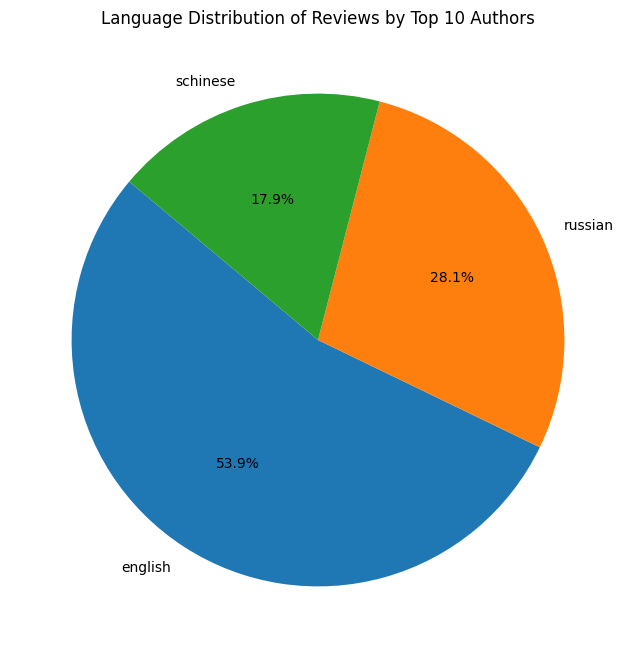

In [31]:
review_count = df.groupby('author.steamid').size().reset_index(name='review_count')
top_authors = review_count.sort_values(by='review_count', ascending=False).head(10)

top_reviews = df[df['author.steamid'].isin(top_authors['author.steamid'])] #we filter the original dataframe to include only the top 10 authors
language_distribution = top_reviews['language'].value_counts()
language_percentage = (language_distribution / language_distribution.sum()) * 100

print(language_percentage)

#Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(language_percentage, labels=language_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Language Distribution of Reviews by Top 10 Authors')
plt.show()

 The percentages of languages used by the top 10 reviewers to write reviews are (as visible in the pie chart):
 
 This shows that the most used language is English, followed by Russian and Simplified Chinese.
 | Language                                   | Percentage of laungauge      |
 |--------------------------------------------|------------------------------|
 |English                                     |53.94%                        |
 |Russian                                     |28.14%                        |
 |Simplified Chinese                          |17.92%                        |


3. Let's examine whether other users found the reviews from these top 10 reviewers helpful or if they were simply spamming. Calculate the average number of valuable votes these reviewers received for their submitted reviews. Elaborate on the results you see.

In [32]:
print(df['votes_helpful'].max())
print(df['votes_helpful'].min()) # i needed to check the two extreme values of the data in this column

4398046511106
0


In [33]:
help=top_reviews.groupby('author.steamid')['votes_helpful'].mean().reset_index(name='avg_helpful_votes')
print(help)

      author.steamid  avg_helpful_votes
0  76561197969749884          26.238636
1  76561197989746995          21.058140
2  76561198013146396           0.969697
3  76561198027973295          11.802083
4  76561198045381877           2.252427
5  76561198062813911           0.885906
6  76561198064946151           3.990000
7  76561198192166873          38.897196
8  76561198239163744           7.641509
9  76561198315585536          49.712121


 ### High Averages:
  If the average helpful votes for a reviewer are significantly high, it suggests that their reviews are well-received and perceived as valuable by the community.
 ### Low Averages: 
 Conversely, if a reviewer's average helpful votes are low, it may indicate that their reviews are not resonating with readers, potentially pointing to spammy or unhelpful content.
 
 
 Based on what can be observed, reviewers 3, 5, 6, 7, and 9, having low averages close to zero, are considered spam by other users or their reviews do not generate particular interest.

 ___


4. Create a plot showing the distribution of the number of reviews each application received from the top 10 reviewers, arranged in descending order.

In [34]:
app = top_reviews['app_name'].value_counts()
app = app.sort_values(ascending=False).head(100)
print(app)

app_name
Hollow Knight                       14
Tomb Raider                         10
Fallout 4                           10
The Witcher 3: Wild Hunt             9
Dead by Daylight                     9
                                    ..
Dishonored                           5
Danganronpa: Trigger Happy Havoc     5
Monster Prom                         5
GRIS                                 5
Portal 2                             5
Name: count, Length: 100, dtype: int64


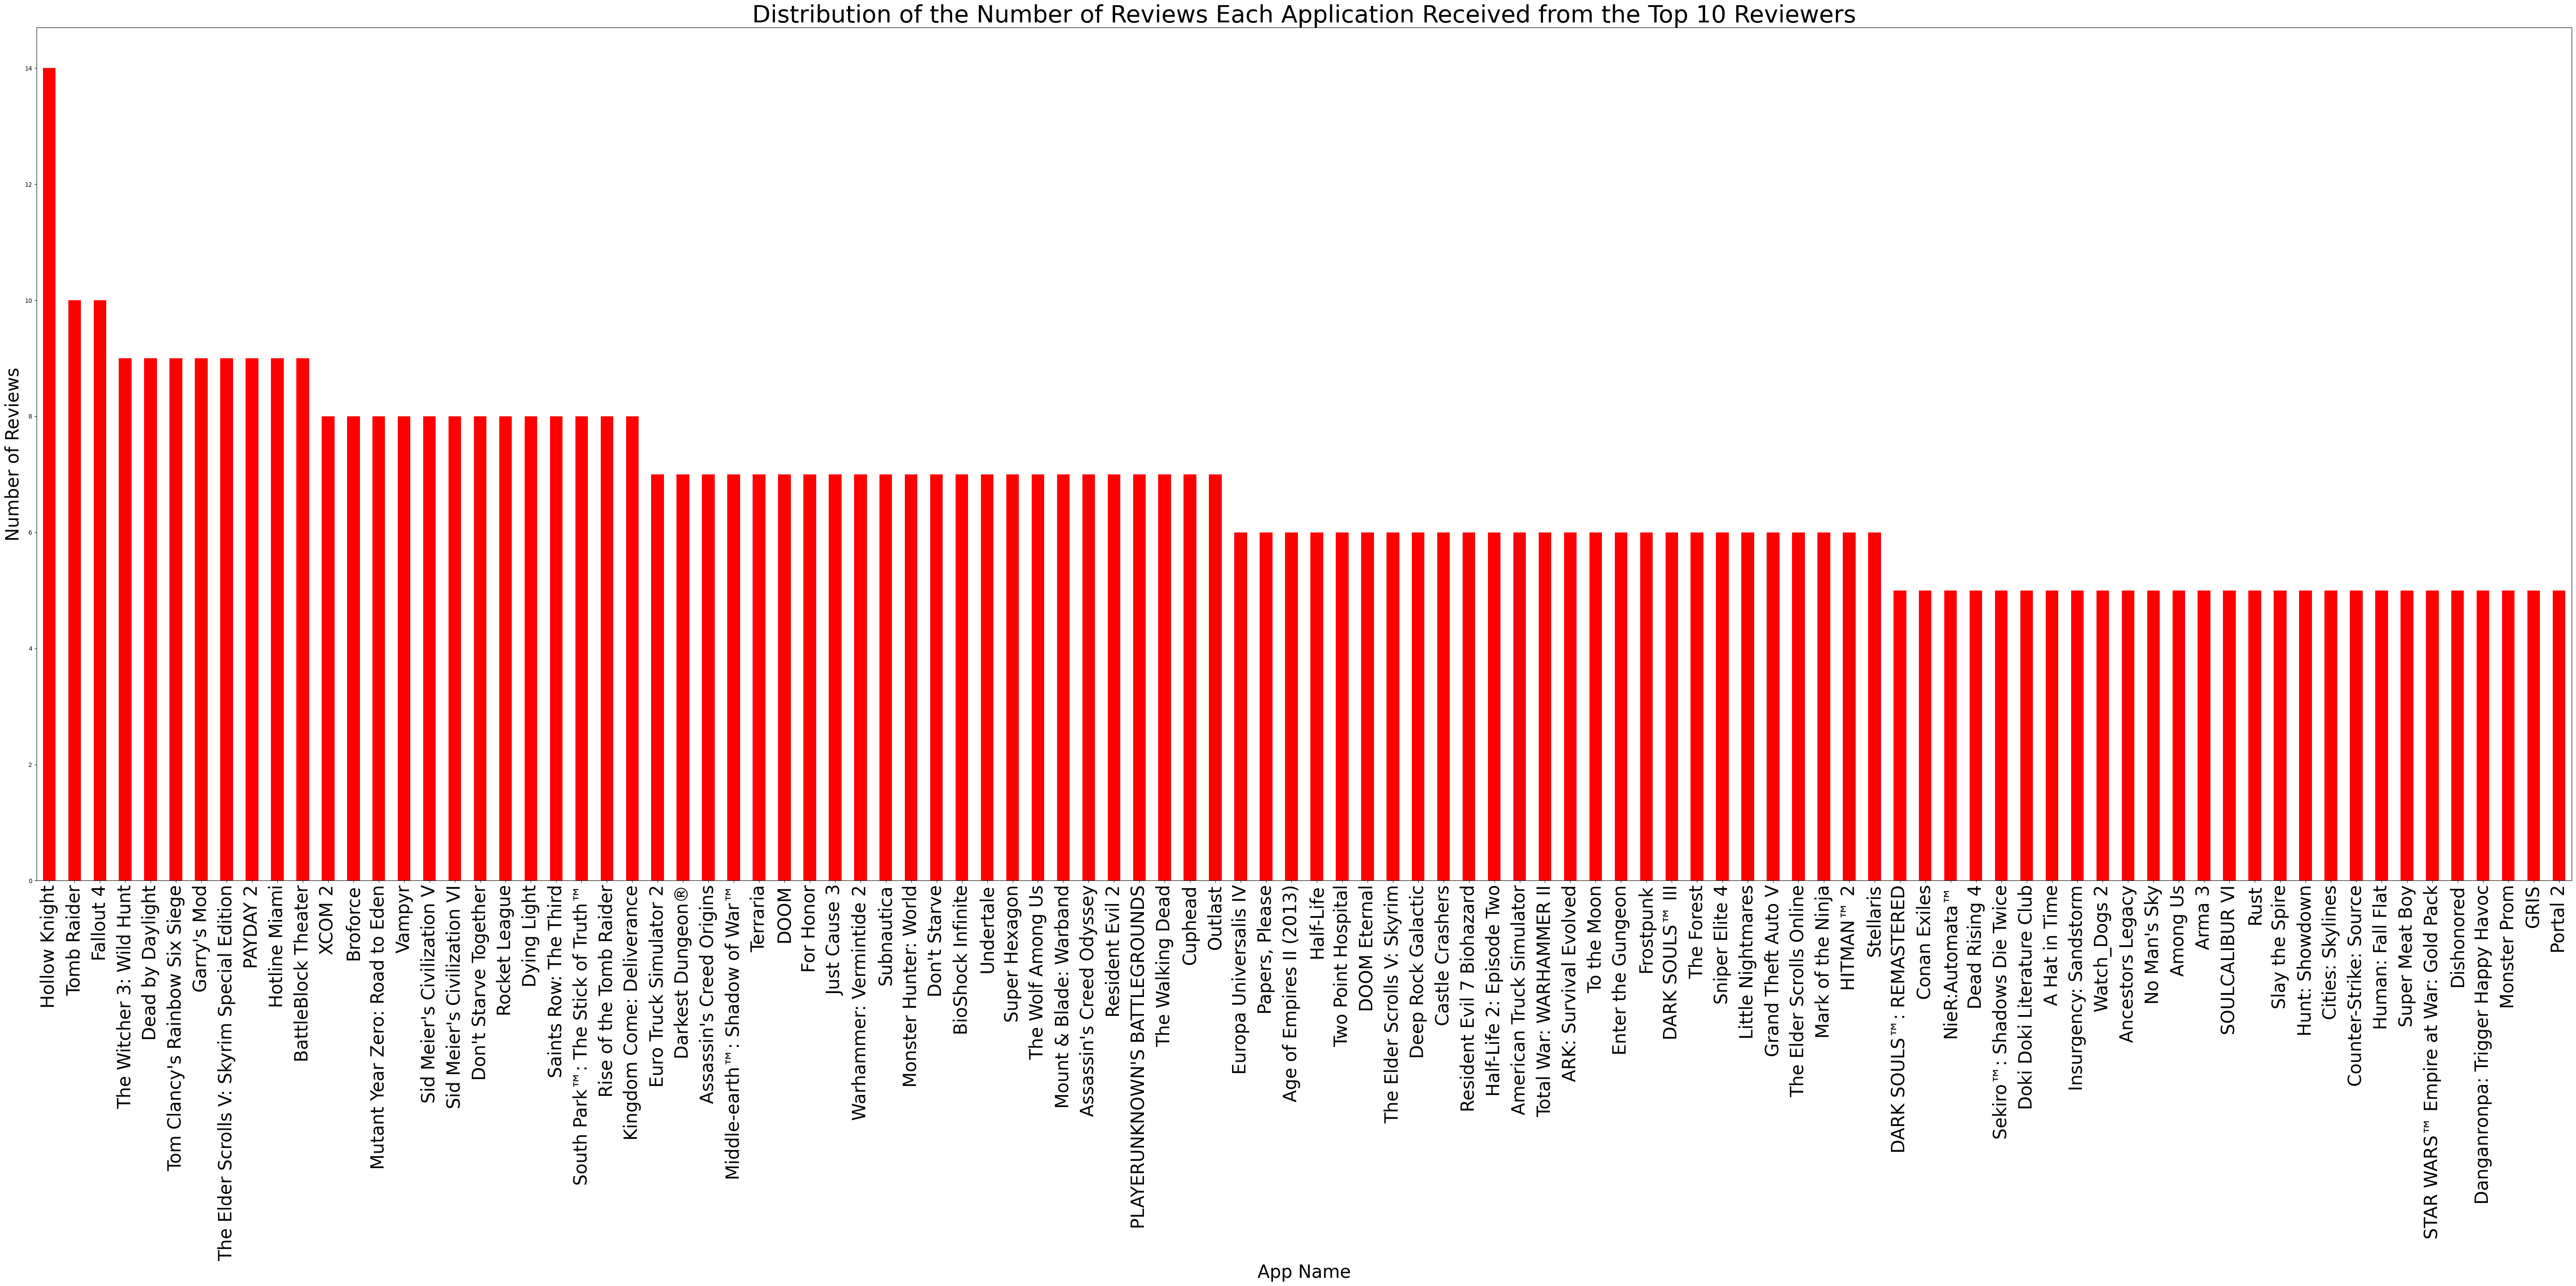

In [35]:
plt.figure(figsize=(60, 30))  # Setting a very large figure size
app.plot(kind='bar', x='app_name', y='number_of_reviews', color='red', legend=False)

plt.title('Distribution of the Number of Reviews Each Application Received from the Top 10 Reviewers', fontsize=40)
plt.xlabel('App Name', fontsize=30)
plt.ylabel('Number of Reviews', fontsize=30)
# Customize the ticks if necessary
plt.xticks(rotation=90, fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()

The application that received the most reviews from the top 10 reviewers is Hollow Knight with 14 reviews, while the apps with the fewest reviews are Dishonored,Danganronpa,Monster Prom,GRIS,Portal 2 with 5 reviews.

---
### **[RQ7] - Probability and Statistical Tests**
---

1. What is the probability of submitting a review and receiving at least one helpful vote from other users?


Through the **complement rule** we know that the probability of an event is equal to \( 1 - the probability of its complementary event\)

Formally:

If \($A$\) is an event, then the probability of \($A$\), denoted P(A), is given by:

$P(A) = 1 - P(A^c)$


where \($A^c$\) represents the complement of \($A$\) (i.e., the event that occurs when \($A$\) does not occur).

##### **Explanation**
- In this case, the probability of receiving at least one helpful votes from other users for each review is equal to 1 - the probability of receiving zero helpful votes from other users for each review.
- The probability of receiving zero helpful votes from other users for each review by the definition of probability is the number of the reviews with zero votes divided by the number of total reviews. 


In [35]:
1 - functions.probability_one_helpful_vote(df)

0.23520355360389988

2. What is the probability of submitting a review and receiving at least one helpful vote from other users, given that you don’t recommend the app?

Given $A$ the event representing the probability of receiving at least one helpful vote from other users,  the probability of submitting a review and receiving at least one helpful vote from other users, given that you don’t recommend the app (event $R$) is equal to:
$$ P(A|R) = \frac{P(A ∩ R)}{P(R)}$$
The Two Probabilities can be computed again through the definition of probability of an event A:
$$ P(A) = \frac{| number\,of\, favourable\,  outcomes\,  | }{| Total\,  number\,  of\,  outcomes\,  |} $$
But this time, for the denominator and numerator, we can check that the Total number of outcomes is the same because its the number of total reviews, so we can equate the first equation to the following:
$$ P(A | R) = \frac{| number\,  of\,  rows\,  where\,  both\,  the\,  event\,  A\,  and\,  R\,  occur\,  | }{|  number\,  of\,  rows\,  where\,  the\,  event\,  R\,  occurs\,   |} $$


In [37]:
functions.conditional_probability_recommended(df)

0.42326108414956315

3. Is the probability of “a review receiving at least one helpful vote” independent of the probability that “the reviewer has submitted at least five reviews before the current review”? Elaborate on it.


To check the independence of two events A and B in probability we can use the **Property of Independence**:
$$ P(A ∩ B) = P(A)*P(B) $$
* But In real-world data, the assumption of perfect independence often doesn’t hold due to noise, sampling errors, or complex underlying patterns. <br>
Directly checking $P(A ∩ B) = P(A) * P(B)$ might lead to misleading conclusions, especially in large datasets where slight discrepancies from exact equality are common.

For this reason, we prefer using the **Chi-Square test** that  is very common for testing the independence between two categorical variables using a contingency table analysis.

In [49]:
functions.check_probability_independence(df)

Chi-Square Test: Chi2=57016.11760344674, p-value=0.0
The two events are NOT independent (significant at 95%)


#### Interpretation
Since the **p-value** is **0.0** (significantly below 0.05), we reject the null hypothesis of independence at the **95% confidence level**. This implies that the two events are **not independent**. In other words, there is a statistically significant association between the two events being analyzed.

These results suggest that changes in one event are likely associated with changes in the other, rather than occurring independently.

---

4. We hypothesize that “reviewers who own a larger number of games are likely to leave fewer reviews on the platform.” Please validate or refute this statement through statistical analysis.


The hypothesis suggests an **inverse relationship** between the number of games owned and the number of reviews submitted. This means we expect that as the number of games owned increases, the number of reviews submitted decreases.
So we'll focus our analysis on the relationship between this two columns:
* ```author.num_games_owned```
* ```author.num_reviews```

To achieve that, we compute the **Spearman coefficient** through the function `corr(..., method = 'spearman')`.


In [27]:
functions.check_correlation(df)

The table describing the major properties of the columns num_games_owned and num_reviews of the DataFrame:        author.num_games_owned  author.num_reviews
count            2.174737e+07        2.174737e+07
mean             1.011300e+06        4.044775e+05
std              2.108829e+09        1.333741e+09
min              0.000000e+00        1.000000e+00
25%              2.200000e+01        2.000000e+00
50%              6.100000e+01        4.000000e+00
75%              1.450000e+02        1.000000e+01
max              4.398047e+12        4.398047e+12
Spearman correlation coefficient: 0.595995138198076


The Spearman correlation's value gives us an idea of a medium strength type of relationship between the two column, seen that the coefficient is not too near to 1.

---
 

5. Ask an LLM tool (such as ChatGPT, Claude AI, Gemini, Perplexity, etc.) to understand the purposes of histograms, bar plots, scatterplots, and pie charts and what kind of insights they offer that might be useful for statistical analysis. Are those results trustworthy, or can you do something to improve somehow the confidence in the suggestions given by the LLM?

This was the question i asked to ChatGPT:
* *"Understand the purposes of histograms, bar plots, scatterplots, and pie charts and what kind of insights they offer that might be useful for statistical analysis"*

This was what the LLM has responded to me:

##### **1. Histograms** 
**Purpose**:
* A histogram is used to visualize the distribution of a dataset by showing the frequency of data points within specified ranges (bins).

**Insights Offered**:

* **Distribution Shape**: Shows whether the data is normally distributed, skewed, or has outliers.
* **Central Tendency**: Provides a visual indication of the mean, median, and mode.
* **Spread**: Helps in understanding the variability in the data, showing where most data points lie and the range of values.
* **Frequency**: Indicates how many observations fall into each range, helping to identify peaks and gaps in the data.

**Use Cases**:
* Analyzing the distribution of test scores, age distribution in a population, or income levels.

##### **2. Bar Plots**
**Purpose**:
* A bar plot (or bar chart) is used to compare different groups or categories by representing their values with bars of different lengths.

**Insights Offered**:
* **Comparison Across Categories**: Easily compares the size of different categories, showing which is larger or smaller.
* **Trends Over Time**: If using a time-based categorical variable, bar plots can illustrate how values change over time.
* **Relative Size**: Helps in understanding the proportional differences among groups.

**Use Cases**:
* Comparing sales across different products, customer satisfaction scores by service type, or survey responses by demographic groups.

##### **3. Scatterplots**
**Purpose**:

* A scatterplot displays values for two different variables on a two-dimensional graph, allowing for the examination of relationships and correlations between them.
**Insights Offered:**

* **Correlation:** Shows the strength and direction of a relationship between two variables (positive, negative, or none).
* **Outliers:** Helps identify any unusual data points that deviate significantly from the trend.
* **Clustering:** Indicates if data points naturally group into clusters, which can suggest the presence of subgroups within the data.
**Use Cases:**

* Analyzing the relationship between hours studied and exam scores, or income versus spending on luxury goods.

##### **4. Pie Charts**
**Purpose:**

* A pie chart is used to show the proportions of a whole, displaying categorical data in slices.

**Insights Offered:**

* **Composition:** Illustrates the parts of a whole, helping to visualize how individual categories contribute to the total.
* **Proportional Relationships:** Useful for showing relative sizes among categories, especially when there are only a few categories.

**Use Cases:**

* Showing market share of companies, demographic breakdown of a population, or budget distribution across departments.  



| Chart Type   | Best For                           | Insights Offered                                   |
|--------------|------------------------------------|---------------------------------------------------|
| Histograms   | Distribution of continuous data    | Distribution shape, central tendency, variability  |
| Bar Plots    | Comparing categorical data         | Size comparison, trends, relative sizes           |
| Scatterplots | Relationships between two variables | Correlation, outliers, clustering                  |
| Pie Charts   | Proportional representation        | Composition, proportional relationships            |




##### **Conclusion**
I agree with the results given by the LLM, in this exercise we can see from the table that the plot that would suit the most would be the Scatter Plot to underline the correlation between the columns *author.num_games_owned* and *author.num_reviews*.

---


### **Bonus**

1. Perform sentiment analysis on the review texts in the top 3 languages and classify them as **positive**, **negative**, or **neutral**.

Before going deep in the sentiment analysis let's define it.

#### What is Sentiment Analysis?
Sentiment analysis is a technique in natural language processing (NLP) used to identify and extract subjective information from text data. It involves analyzing text to classify the sentiment expressed, typically as **positive**, **negative**, or **neutral**. 

In this code, we use the **VADER (Valence Aware Dictionary and sEntiment Reasoner)** sentiment analyzer, a lexicon-based tool optimized for social media and general text sentiment analysis.

The code leverages the `SentimentIntensityAnalyzer` from the **Natural Language Toolkit (NLTK)** library to classify text sentiment.


We have divided in three steps the development of the solution :

#### Step 1: Initialize the Sentiment Analyzer
```python
sia = SentimentIntensityAnalyzer()
```
- Initializes the `SentimentIntensityAnalyzer` from the VADER sentiment analysis tool, allowing sentiment scoring on text data.

#### Step 2: Data Preparation
- For computational issues, we have decided to perform the sentiment analysis only on the most used language on Steam: **English**.
We have also tried to use the python library **googletrans** to handle the other reviews, but it's based on Google Translate APIs, which resulted in poor computational efficiency.


```python
   top_languages = df['language'].value_counts().nlargest(1).index.tolist() 
   ``` 
This line identifies the most frequently occurring language in the `language` column of the DataFrame df and stores it in the top_languages list. 
We have then filtered the dataframe for the reviews that have been written in the languages contained in the list `top_languages` and cleared the null values.

```python
    df_top_languages = df[df['language'].isin(top_languages)]
    df_top_languages = df_top_languages[df_top_languages['review'].notna()]
   ``` 
In the end, we have applied the functions `get_sentiment_score` and `identify_sentiment` for each row of the filtered DataFrame.


#### Step 3: Define Sentiment Classification
- The `get_sentiment_score` function gives a score to the sentiment perceived in the text

- The `identify_sentiment` function classify a given text's sentiment score to 3 labels

    -  **Polarity Scoring**: We have used the VADER `compound` score to classify the review:
    
        - Positive: if `compound` > 0

        - Negative: if `compound` < 0
        
        - Neutral: if `compound` = 0

In [48]:
df_sentiment_analysis = functions.sentiment_classification(df)


In [49]:
df_sentiment_analysis[['app_name', 'review_id', 'language', 'review', 'sentiment', 'sentiment_score']].head()

,app_name,review_id,language,review,sentiment,sentiment_score
3,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",positive,0.7964
5,The Witcher 3: Wild Hunt,85184171,english,"good story, good graphics. lots to do.",positive,0.7003
6,The Witcher 3: Wild Hunt,85184064,english,"dis gud,",neutral,0.0000
18,The Witcher 3: Wild Hunt,85180436,english,favorite game of all time cant wait for the Ne...,positive,0.4588
20,The Witcher 3: Wild Hunt,85179753,english,Why wouldn't you get this,neutral,0.0000


2. What is the distribution of sentiment across all reviews?


In the function `compute_distribution` we compute the ditrbution of sentiment in the dataset resulted from the previous exercise. 

Using the function `value_counts(normalize=True)`, we are able to merge the count of the reviews grouping by the column *sentiment* and the normalization to obtain a frequency.

In the end, we create a pie chart to highlight the distribution.

Sentiment Distribution (in %):
sentiment
positive    69.741336
neutral     15.385620
negative    14.873044
Name: proportion, dtype: float64


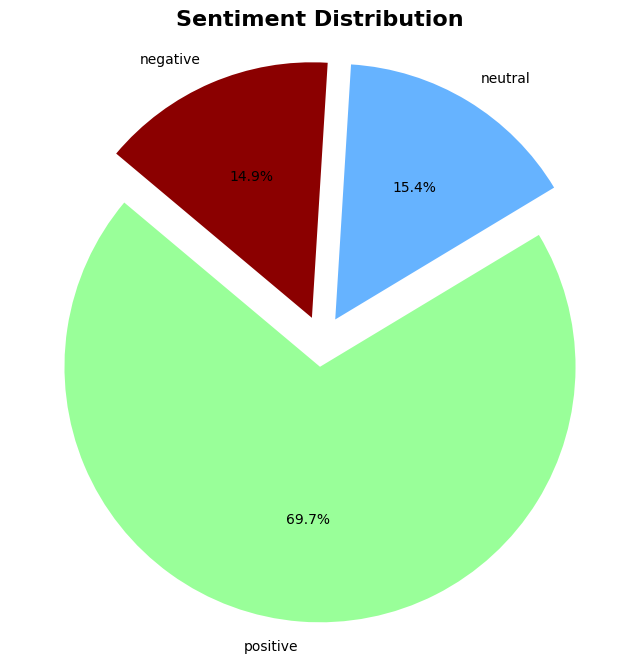

In [50]:
functions.compute_distribution(df_sentiment_analysis)

The sentiment distribution of the reviews is presented below, expressed as percentages:

- **Positive Sentiment**: 69.68%
  - This indicates that a significant majority of the reviews are perceived positively, suggesting that users generally have a favorable opinion of the product or service.
  
- **Neutral Sentiment**: 15.41%
  - A smaller portion of the reviews are classified as neutral, meaning that these reviews do not express a strong opinion either way. This could indicate a lack of strong feelings about the product among some users.
  
- **Negative Sentiment**: 14.91%
  - A minority of the reviews are negative, which highlights that there are some users who have had unsatisfactory experiences. However, this percentage is relatively low compared to the positive sentiment.

### Summaries

Overall, the sentiment analysis reveals a predominantly positive outlook among reviewers, with over two-thirds of the reviews expressing positive sentiments. This finding may be indicative of the product's strengths and user satisfaction, while the lower percentages of neutral and negative sentiments could suggest areas for potential improvement.

___

3. Does the sentiment analysis align with whether the application is recommended or not? Explain any insights from this comparison.


### **2 Steps**

#### **First Step**

To represent the alignment between the two columns, we have decided to show the sentiment distribution by Recommendation.

The following table printed by the function  `comparison_sentiment_recommendations` shows the count and the percentage of each sentiment type (negative, neutral, positive) for two groups: 
- reviews that do not recommend the item (marked as False) 
- reviews that do recommend it (marked as True)

In [51]:
functions.comparison_sentiment_recommendations(df_sentiment_analysis)

Sentiment Distribution by Recommendation:
sentiment    negative  neutral  positive
recommended                             
False          533073   138229    379258
True           897518  1341665   6328940

Sentiment Percentage by Recommendation:
sentiment     negative    neutral   positive
recommended                                 
False        50.741795  13.157649  36.100556
True         10.475083  15.658797  73.866120


### Insights

1. **Overall Sentiment Distribution**:
   - The number of reviews is significantly higher for users who recommended the product (True) compared to those who did not (False). This suggests that satisfied customers are more likely to leave reviews.

2. **Negative Sentiment**:
   - Among users who did not recommend the product, **50.74%** of the reviews are negative. This high percentage indicates a substantial level of dissatisfaction among non-recommenders, suggesting critical issues with the product or service that need addressing.
   - In contrast, only **10.48%** of the reviews from recommenders are negative, pointing to a strong positive reception among satisfied users.

3. **Positive Sentiment**:
   - A significant **73.87%** of the reviews from recommenders are positive, showcasing a high level of satisfaction and endorsement for the product. This reinforces the idea that users who enjoy the product are likely to recommend it.
   - Conversely, only **36.10%** of non-recommenders expressed positive sentiments, indicating that even among those who left favorable reviews, many did not find the product compelling enough to recommend.

4. **Neutral Sentiment**:
   - The percentage of neutral reviews is higher among non-recommenders (**13.16%**) compared to recommenders (**15.66%**). This suggests that some users may have had mixed feelings about the product, which did not lead them to a strong recommendation either way.


#### **Second Step**

We represent the alignment between the two columns creating a scatter plot between the `sentiment_score` and the `recommended` columns.

- We can notice that the `recommended` column is a binary value (True, False), so it wouldnt fit perfectly a scatter plot. For this reason, we can create the `recommended_score` column that takes for every review the percentage of recommendations for that app. We also create a new DataFrame averaging the `sentiment_score` column that fit the size of the `recommended_score` column


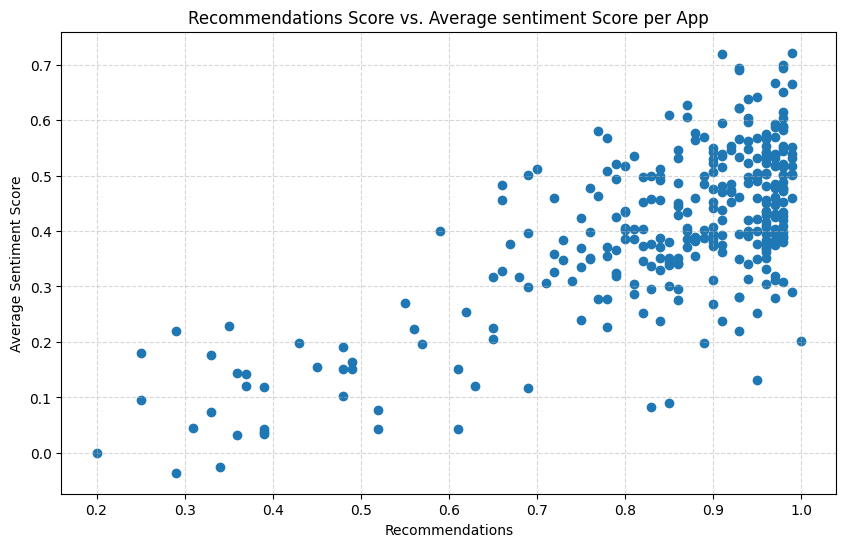

In [53]:
# As stated before, we are working only on the english written reviews
# The sum converts firstly to int the Boolean values in the column 'recommended'
numberof_recommended_english_reviews = df_sentiment_analysis.groupby('app_name')['recommended'].sum()
numberof_total_english_reviews = df_sentiment_analysis.groupby('app_name')['recommended'].count()
average_sentiment_score = df_sentiment_analysis.groupby('app_name')['sentiment_score'].mean()

#We create a DataFrame to 
grouped_dataframe = pd.DataFrame({
'recommended_score': round(numberof_recommended_english_reviews / numberof_total_english_reviews, 2), 
'average_sentiment_score': average_sentiment_score
})


# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(grouped_dataframe['recommended_score'], grouped_dataframe['average_sentiment_score'])
plt.title('Recommendations Score vs. Average sentiment Score per App')
plt.xlabel('Recommendations')
plt.ylabel('Average Sentiment Score')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

Seen that there is a sort of linear relationship between the two columns we compute the **Pearson coefficient** to respond to the question. 

In [54]:
pearsonr(grouped_dataframe['recommended_score'], grouped_dataframe['average_sentiment_score'])

PearsonRResult(statistic=0.7049758976007278, pvalue=1.2614378636734573e-48)

### Summary

The analysis highlights a clear positive correlation between recommendation status and sentiment. Users who recommend the product tend to have overwhelmingly positive sentiments, while those who do not recommend it exhibit significant dissatisfaction. Addressing the concerns of non-recommenders could be crucial for improving overall product reception and increasing positive reviews.

___

4. Is there a correlation between the sentiment of a review and the number of helpfulness votes it receives? Provide an analysis of the results and discuss potential trends.


To study the correlation between the sentiment of a review and the number of helpful votes we act in two ways:

- We show the scatter plot (like we have asked in ChatGPT in **RQ7.5**, it is one of the best choices to test the correlation between two features)
    - We use the `Average Sentiment Score` for every app and a Ratio that represents the variable `votes_helpful`

- We use the Pearson Coefficient as a Statistical Test to check the correlation between the two columns

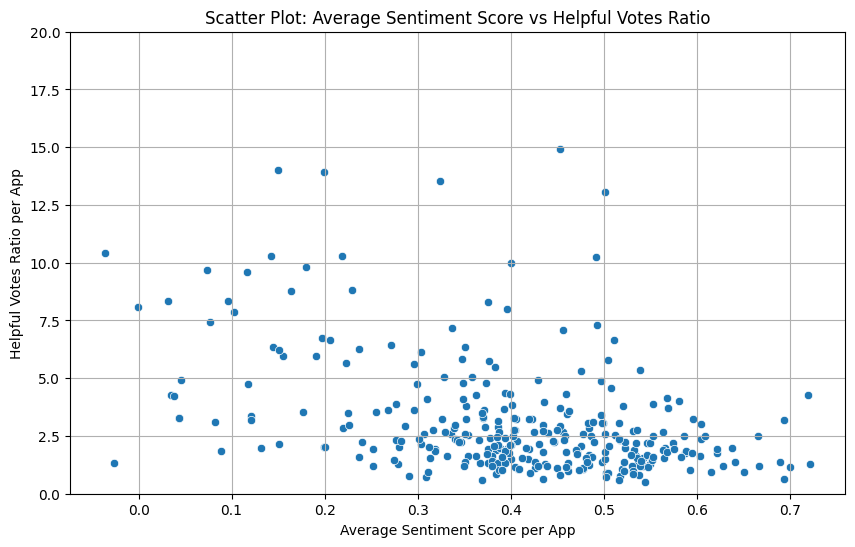

Pearson correlation coefficient: -0.01


In [86]:
# We return the Dataframe with the grouped data by app_name
grouped_df = functions.correlation_sentiment_helpful_votes(df_sentiment_analysis)

From the scatter plot we can understand that there is a negative correlation (like Spearman confirms) between the sentiment scores and the helpful votes. 
But testing the code, we have seen that the outliers of the ratio column are very heavy on the distribution.
So we try to filter out this values and compute again the **Pearson coefficient**

In [87]:
# We filter out the outliners for the ratio
grouped_df = grouped_df[grouped_df['helpful_votes_recommended_ratio'] <= grouped_df['helpful_votes_recommended_ratio'].quantile(0.95)]

# Calculate Pearson correlation coefficient
pearson_corr = grouped_df['average_sentiment_score'].corr(grouped_df['helpful_votes_recommended_ratio'], method = 'pearson')

print(f"Pearson correlation coefficient: {pearson_corr:.2f}")


Pearson correlation coefficient: -0.42


Now the pearson coefficient gives us a stronger negative linear relationship between the two columns after having filtered out all the outiers.

Our interpretation is that this could reflect common user behavior: 
- Critical reviews are often seen as more informative or noteworthy than positive ones.

Therefore a negative review could let the users to question their opinions or convince them not to buy a videogame.

---
### **Algorithmic Question (AQ)**
---

You are given two positive integers, 
$n$ (where $1 ≤ n ≤ 10^9$ ) and $k$ (where $q ≤ k ≤ 100$). Your task is to express n as the sum of $k$ positive integers, all having the same parity (i.e., all have the same remainder when divided by 2, meaning they are either all even or all odd). In other words, find $a_1 , a_2 , . . . , a_k\;each\;a_i > 0$ , $n = a_1 + a_2 + . . . + a_k$, and all $a_i$ simultaneously are either even or odd. If it's impossible to represent $n$ in this way, report that no such representation exists.

#####   **Input**
In the first input line, you will receive a number $t$ (where $1 ≤ t ≤ 100$ ), representing the number of test cases. The following $t$ lines will contain two values, $n$ and $k$ , corresponding to each test case.

#####   **Output**
For each test case, if it is possible to represent $n$ as the sum of $k$ positive integers, all of the same parity (either all even or all odd), print "YES" and provide the corresponding values of $a_i$ in the next line. If there are multiple valid solutions, you can print any of them. If such a representation is not possible for a given test case, print "NO".


1. Implement a Python program to solve the problem above.


##### ***Algorithm***

This algoritms works by floor dividing n with k and then creating a k long list with the result.
The floor division will enshure the polarity of the list, as all odd or even, as all number are the same.
In case the floor division looses some numbers i do the subtraction and to get the lost number,
if the remider is even it will not change the polarity and i add it to the first number if the number is odd i add 1 and subtract 1 from se second item int the list to change polarity and then add the odd reminder to the first element.
There are three existence conditions, first of all the floor division must be diffrent from 0 then the two are in canse of a odd remider, the list needs to be odd as we do +1 and -1 from the second item so to not change the total
and the other ceck is to see if the floor division is one os doing +1 and -1 will result in 0 in the list

In [ ]:

with open("algoritmic_input.txt") as file:
    t = int(file.readline().strip())
    for _ in range(t):
        n, k = int(file.readline().strip()).split()
        functions.algorithmic_question(n, k)


2. Please provide an analysis of your code's time complexity using Big O notation.

##### ***Complexity analysis***

#### Our result : O(t*k)


3. Ask an LLM tool (such as ChatGPT, Claude AI, Gemini, Perplexity, etc.) to evaluate the time complexity of your code using Big O notation. Is the assessment accurate? If it differs from your previous analysis, which would be correct? Please explain your reasoning.

#### Chat GPT result : O(t*K)

Chat GPT analized the code and confirmed the score we hypotezied, since we create a k element list and never iterate over it we have that each t iteration takes O(k) therfore the total runtime is O(t*k) wich chat GPT furter reduce since both these parameters are bound between 1 and 100 meaning that in the worst case is O(10000) and since it is a finite number this algorithm runs in lenear time O(1)